Import the package needed in the kernel

In [31]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import the data we need

In [85]:
gender_df=pd.read_csv('./titanic_data/gender_submission.csv')
test_df=pd.read_csv('./titanic_data/test.csv')
train_df=pd.read_csv('./titanic_data/train.csv')
display(gender_df.head())
display(test_df.head())
display(train_df.head())
all_data=pd.concat([test_df,train_df])

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
display(test_df.shape) #check the size of test dataset
display(train_df.shape) #check the size of train dataset
display(train_df.columns)

(418, 11)

(891, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [87]:
train_numeric=train_df[['PassengerId','Pclass','Age','Survived','SibSp','Parch','Fare']]
train_value=train_df[['Name','Sex','Ticket','Cabin']]

In [88]:
train_numeric.head()

,PassengerId,Pclass,Age,Survived,SibSp,Parch,Fare
0,1,3,22.0,0,1,0,7.2500
1,2,1,38.0,1,1,0,71.2833
2,3,3,26.0,1,0,0,7.9250
3,4,1,35.0,1,1,0,53.1000
4,5,3,35.0,0,0,0,8.0500


In [89]:
train_value.head()


,Name,Sex,Ticket,Cabin
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123
4,"Allen, Mr. William Henry",male,373450,NaN


In [90]:
train_numeric.drop(columns={'PassengerId'},inplace=True)
train_numeric.head()

/var/folders/17/0v692tvj1vvcwr873cmmdlyr0000gn/T/ipykernel_53334/3280463502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numeric.drop(columns={'PassengerId'},inplace=True)


,Pclass,Age,Survived,SibSp,Parch,Fare
0,3,22.0,0,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,3,26.0,1,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,3,35.0,0,0,0,8.0500


<Axes: >

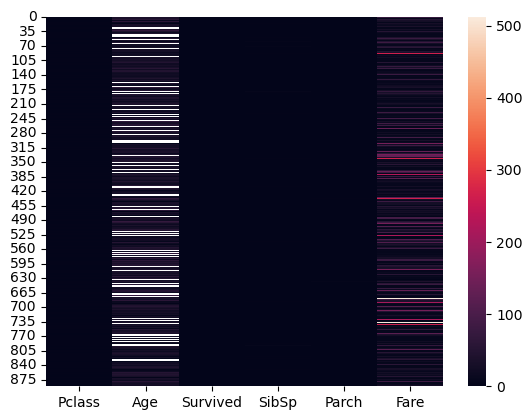

In [91]:
sns.heatmap(train_numeric)

In [92]:
print(train_numeric.corr())

            Pclass       Age  Survived     SibSp     Parch      Fare
Pclass    1.000000 -0.369226 -0.338481  0.083081  0.018443 -0.549500
Age      -0.369226  1.000000 -0.077221 -0.308247 -0.189119  0.096067
Survived -0.338481 -0.077221  1.000000 -0.035322  0.081629  0.257307
SibSp     0.083081 -0.308247 -0.035322  1.000000  0.414838  0.159651
Parch     0.018443 -0.189119  0.081629  0.414838  1.000000  0.216225
Fare     -0.549500  0.096067  0.257307  0.159651  0.216225  1.000000


In [93]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [94]:
women_survived=train_df[train_df.Sex=='female']['Survived']
temp=train_df.groupby(['Sex','Survived']).PassengerId.count()# To split the group by the groupby function
temp

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [95]:
women_survived.sum()

233

In [96]:
women_survived_rate=women_survived.sum()/len(women_survived)
print(f'Women survived ratio is {women_survived_rate:.2%}')

Women survived ratio is 74.20%


In [97]:
men_survived=train_df[train_df.Sex=="male"]['Survived']
men_survived_rate=men_survived.sum()/len(men_survived)
print(f"Men survived ratio is {men_survived_rate:.2%}")

Men survived ratio is 18.89%


From the ratio, obviously,the ratio in male is less than which in women

**Not like the common sense**

**Learning Model choose -- random forest model**

In [98]:
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'sklearn'

In [99]:
y=train_df['Survived']
feture=['Pclass','Sex','SibSp','Parch']
X=pd.get_dummies(train_df[feture])
X_test=pd.get_dummies(test_df[feture])
model=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
model.fit(X,y)
predictions=model.predict(X_test)
output=pd.DataFrame({'PassengerId':test_df.PassengerId,'Survived':predictions})
output.to_csv('result.csv',index=False)
print("Done")

NameError: name 'RandomForestClassifier' is not defined

1. We should focued on the data that X and y. y means the value we have got,X is the train data.
2. The konowledge of scikit-learn kernel is needed

## Light Data Exploration 
1. For numeric data
- Made histplot to get the distributions of the data
- get the correlationship
- Pviot tablecomparing survival rate across numeric data

2. For categorical data
- Made bar charts to understand balance of classes
- Made pivot tables to understand relationship with survial
  

In [100]:
train_df.info() # data type and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
train_df.describe() # understand better of the data,
#tendency of data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
train_df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [103]:
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

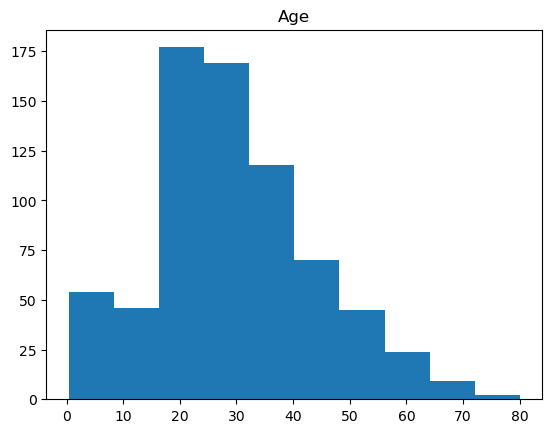

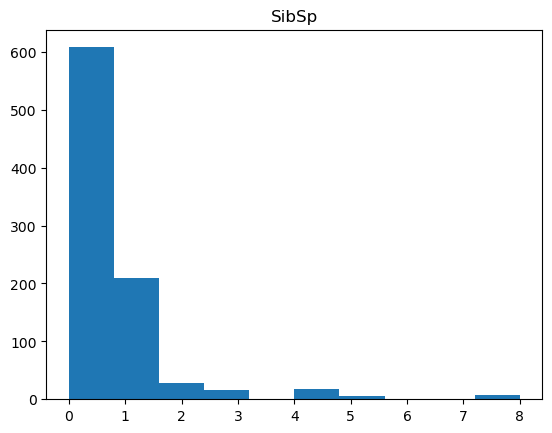

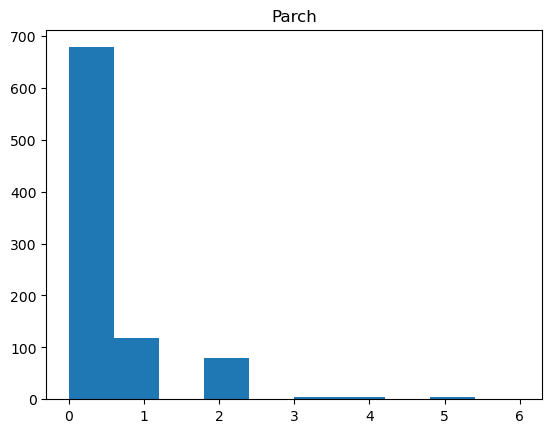

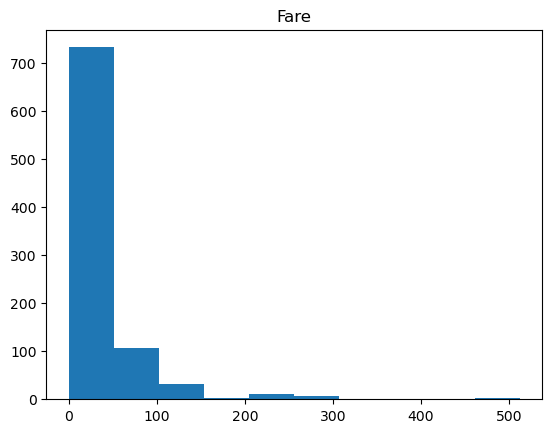

In [104]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Obviously, there are some kind of data is not normal distribution so we need preprocess the data for next step.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

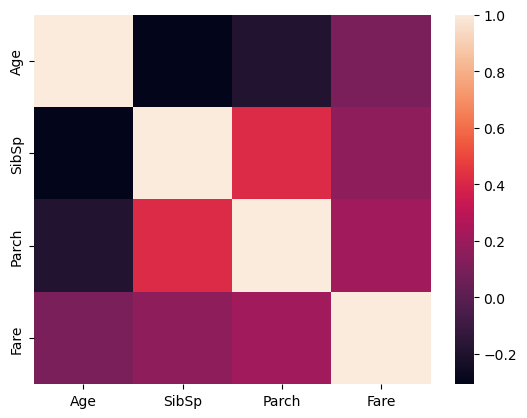

In [105]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [106]:
pd.pivot_table(train_df,index='Survived',values=df_num.columns)
# If the value of columns is greater than number of index, it will calculate the mean value to replace.

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [107]:
# for i in df_cat.columns:
#     sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts())
#     plt.title(i)
#     plt.show()

In [108]:
for i in df_cat.columns:
    print(df_cat[i].value_counts)
    print(df_cat[i].value_counts().index)

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
10

In [109]:
print(pd.pivot_table(train_df,index='Survived',columns='Pclass',values='Ticket',aggfunc='count'))
print('-'*20)
print(pd.pivot_table(train_df,index='Survived',columns='Sex',values='Ticket',aggfunc='count'))
print('-'*20)
print(pd.pivot_table(train_df,index='Survived',columns='Embarked',values='Ticket',aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
--------------------
Sex       female  male
Survived              
0             81   468
1            233   109
--------------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


#### The ticket and cabin graphs are very messy. We need to do engeering on it
1. Cabin-Simplify the cabin or the purchase of tickets across multiple cabins.
2. Tickets- Do different types impact survival rates?
3. Does a person's title relate to survival rates? 

In [110]:
df_cat.Cabin
train_df['cabin_multiple']=train_df.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_df.cabin_multiple.value_counts()

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

In [111]:
pd.pivot_table(train_df,index='Survived',columns='cabin_multiple',values='Ticket',aggfunc='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [112]:
# create catagories based on cabin letter(n stands for null)
# treat null value as its own catagory
train_df['cabin_adv']=train_df.Cabin.apply(lambda x: str(x)[0])

In [113]:
train_df.cabin_adv.value_counts()

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [114]:
pd.pivot_table(train_df,index='Survived',columns='cabin_adv',values='Name',aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [115]:
train_df['ticket_numeric']=train_df['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
train_df['ticket_numeric'].head()

0    0
1    0
2    0
3    1
4    1
Name: ticket_numeric, dtype: int64

In [116]:
train_df.Ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [117]:
train_df['ticket_letters']=train_df['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1])>0 else 0)

In [130]:
train_df['ticket_letters'].head()

0        a5
1        pc
2    stono2
3         0
4         0
Name: ticket_letters, dtype: object

In [119]:
# compare non-numeric ticket with numeric ticket
pd.pivot_table(train_df,index='Survived',columns='ticket_letters',values='Ticket',aggfunc='count') 

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [120]:
pd.options.display.max_rows=999
train_df['ticket_letters'].value_counts()


ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [121]:
pd.pivot_table(train_df,index='Survived',columns='ticket_numeric',values='Ticket',aggfunc='count')

ticket_numeric,0,1
Survived,,
0,142,407
1,88,254


In [122]:
# engineering on person title
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [123]:
train_df['person_title']=train_df['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])

In [124]:
train_df.person_title.head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: person_title, dtype: object

# Data processing for model
1. Drop nulll values
2. Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)
3.  Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder)
4.  Impute data with mean for fare and age (Should also experiment with median)
5.  Normalized fare using logarithm to give more semblance of a normal distribution
6.  Scaled data **0-1** with stand scaler

In [126]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [127]:
all_data['cabin_multiple']=all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

In [128]:

all_data['cabin_multiple'].value_counts()

cabin_multiple
0    1014
1     254
2      26
3      10
4       5
Name: count, dtype: int64

In [129]:
all_data.Cabin.head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Cabin, dtype: object

In [132]:
all_data['cabin_adv']=all_data.Cabin.apply(lambda x:str(x)[0])
all_data['numeric_ticket']=all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [133]:
all_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_multiple,cabin_adv,numeric_ticket,ticket_letters,name_title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,0,n,1,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,0,n,1,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,0,n,1,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,0,n,1,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,0,n,1,0,Mrs
